# Painting-To-Artist Image Classification Project

#### Imports

In [1]:
import os
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import preprocessor as prp
import seaborn as sns
import matplotlib.pyplot as plt
import random

#### Data Preprocessing
Change the dataset_path to the path of the dataset accordingly.

In [2]:
dataset_path = os.path.abspath(r'D:\Program Files (x86)\Github\CoinsRecognition\New_Images')

n = 150
ratio = 0.9
size = 256
pca_components_threshold = 0.95

x_train, x_test, y_train, y_test, le = prp.preprocess_data(dataset_path, n, ratio, size, pca_components_threshold, 'minmax')

#### Model Preferences

In [3]:
model_iterations = 20
score = 'accuracy'
seed = random.randint(0, 9999)

### KNN Model

D:\Programs\Anaconda\envs\tensorFlow\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.53913043        nan 0.53478261        nan 0.52608696
        nan 0.57826087        nan 0.56521739        nan 0.51304348
        nan 0.57391304        nan 0.44782609        nan 0.53913043
        nan 0.53043478]
  warnings.warn(


Best KNN Params:    {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
Empirical Accuracy: 1.000
True Accuracy:      0.655


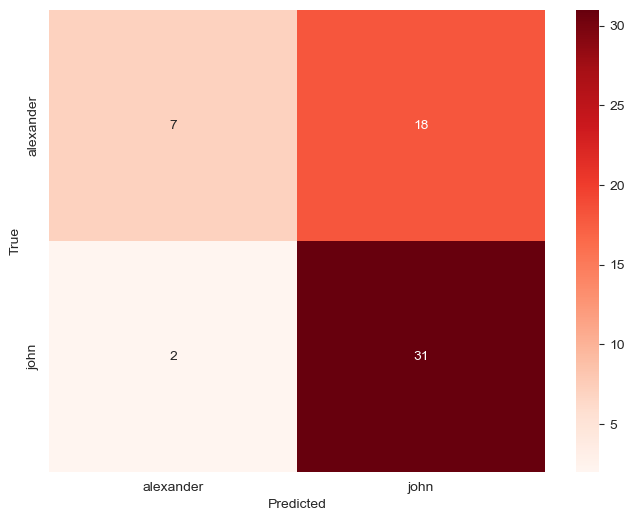

In [4]:
knn_hyperparameters = {
    'n_neighbors': [3, 5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# We create our KNN model
knn = KNeighborsClassifier(algorithm='auto')

# Then we perform a GridSearchCV to find the best hyperparameters, on each of the times rkf splits the data and iterates over it
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_hyperparameters, cv=5, scoring=score, n_jobs=3)
knn_grid_search.fit(x_train, y_train)

knn_best_params = knn_grid_search.best_params_

print("Best KNN Params:    {}".format(knn_best_params))
print("Empirical Accuracy: {:.3f}".format(knn_grid_search.score(x_train, y_train)))
print("True Accuracy:      {:.3f}".format(knn_grid_search.score(x_test, y_test)))

knn_predictions = knn_grid_search.predict(x_test)

conf_mat = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap = 'Reds', fmt='g', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')

plt.savefig('knn_confusion_matrix.png', dpi=300)
plt.show()

In [5]:
# Print the classification report
print(classification_report(y_test, knn_predictions, target_names=le.classes_, zero_division=0))

              precision    recall  f1-score   support

   alexander       0.78      0.28      0.41        25
        john       0.63      0.94      0.76        33

    accuracy                           0.66        58
   macro avg       0.71      0.61      0.58        58
weighted avg       0.70      0.66      0.61        58


### Random Forest Model

Best RF Params:    {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 40}
Empirical Accuracy: 1.000
True Accuracy:      0.362


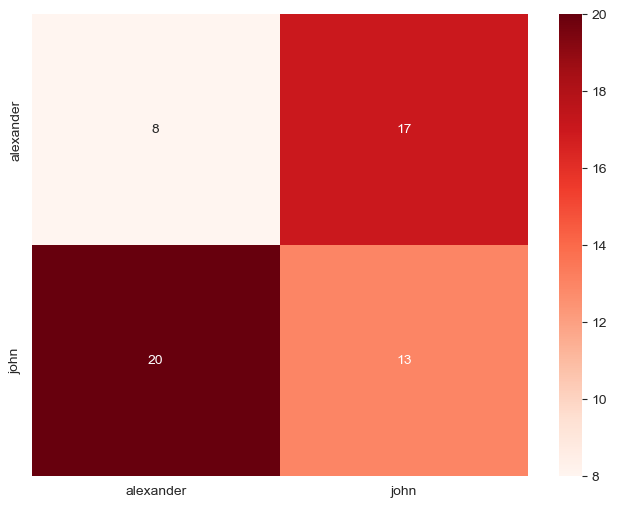

In [6]:
rf_hyperparameters = {
    'n_estimators': [20, 30, 40],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6 , 8, 10],
    'criterion': ['gini', 'entropy'],
}

# We create our Random Forest model
rf = RandomForestClassifier(random_state=seed)

# Then we perform a GridSearchCV to find the best hyperparameters, on each of the times rkf splits the data and iterates over it
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_hyperparameters, cv=5, scoring=score, n_jobs=3)
rf_grid_search.fit(x_train, y_train)

rf_best_params = rf_grid_search.best_params_

print("Best RF Params:    {}".format(rf_best_params))
print("Empirical Accuracy: {:.3f}".format(rf_grid_search.score(x_train, y_train)))
print("True Accuracy:      {:.3f}".format(rf_grid_search.score(x_test, y_test)))

rf_predictions = rf_grid_search.predict(x_test)

conf_mat = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap = 'Reds', fmt='g', xticklabels=le.classes_, yticklabels=le.classes_)

plt.savefig('rf_confusion_matrix.png', dpi=300)
plt.show()

In [7]:
# Print the classification report
print(classification_report(y_test, rf_predictions, target_names=le.classes_, zero_division=0))

              precision    recall  f1-score   support

   alexander       0.29      0.32      0.30        25
        john       0.43      0.39      0.41        33

    accuracy                           0.36        58
   macro avg       0.36      0.36      0.36        58
weighted avg       0.37      0.36      0.36        58


### AdaBoost Model

Best AB Params:    {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 40}
Empirical Accuracy: 0.996
True Accuracy:      0.552


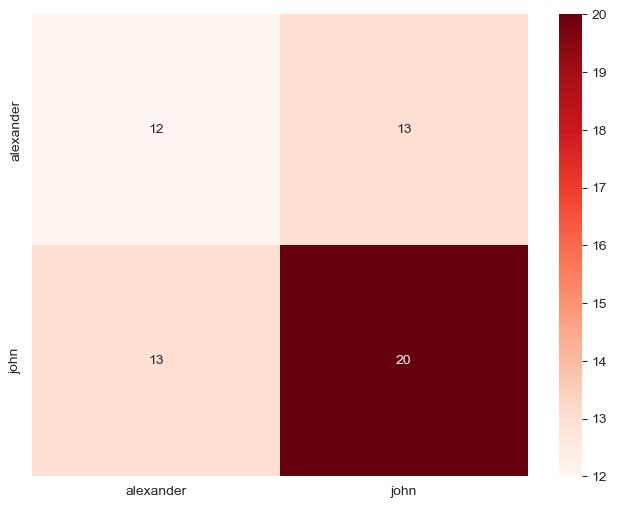

In [8]:
ab_hyperparameters = {
    'n_estimators': [40, 50, 60],
    'learning_rate': [0.1 ,0.5, 1],
    'algorithm': ['SAMME.R']
}

# We create our AdaBoost model
ab = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=seed)

# Then we perform a GridSearchCV to find the best hyperparameters, on each of the times rkf splits the data and iterates over it'
ab_grid_search = GridSearchCV(estimator=ab, param_grid=ab_hyperparameters, cv=5, scoring=score, n_jobs=3)
ab_grid_search.fit(x_train, y_train)

ab_best_params = ab_grid_search.best_params_

print("Best AB Params:    {}".format(ab_best_params))
print("Empirical Accuracy: {:.3f}".format(ab_grid_search.score(x_train, y_train)))
print("True Accuracy:      {:.3f}".format(ab_grid_search.score(x_test, y_test)))

ab_predictions = ab_grid_search.predict(x_test)

conf_mat = confusion_matrix(y_test, ab_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap = 'Reds', fmt='g', xticklabels=le.classes_, yticklabels=le.classes_)

plt.savefig('ab_confusion_matrix.png', dpi=300)
plt.show()

In [9]:
# Print the classification report
print(classification_report(y_test, ab_predictions, target_names=le.classes_, zero_division=0))

              precision    recall  f1-score   support

   alexander       0.48      0.48      0.48        25
        john       0.61      0.61      0.61        33

    accuracy                           0.55        58
   macro avg       0.54      0.54      0.54        58
weighted avg       0.55      0.55      0.55        58


### SVM Model

Best SVM Params:    {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Empirical Accuracy: 1.000
True Accuracy:      0.586


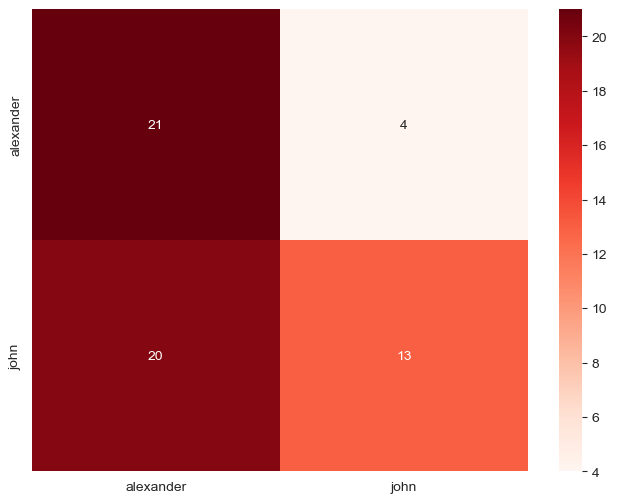

In [10]:
svm_hyperparameters = {
    'C': [0.1, 1, 10, 100], # Regularization parameter, meaning the higher the value, the more the model will overfit
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 
    'gamma': ['scale', 'auto'] # scale - 1 / (n_features * X.var()) ;  auto - 1 / n_features
}

# We create our SVM model
svm = SVC(decision_function_shape='ovo')

# Then we perform a GridSearchCV to find the best hyperparameters, on each of the times rkf splits the data and iterates over it
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_hyperparameters, cv=5, n_jobs=3)
svm_grid_search.fit(x_train, y_train)

svm_best_params = svm_grid_search.best_params_

print("Best SVM Params:    {}".format(svm_best_params))
print("Empirical Accuracy: {:.3f}".format(svm_grid_search.score(x_train, y_train)))
print("True Accuracy:      {:.3f}".format(svm_grid_search.score(x_test, y_test)))

svm_predictions = svm_grid_search.predict(x_test)

conf_mat = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap = 'Reds', fmt='g', xticklabels=le.classes_, yticklabels=le.classes_)

plt.savefig('svm_confusion_matrix.png', dpi=300)
plt.show()

In [11]:
# Print the classification report
print(classification_report(y_test, svm_predictions, target_names=le.classes_, zero_division=0))

              precision    recall  f1-score   support

   alexander       0.51      0.84      0.64        25
        john       0.76      0.39      0.52        33

    accuracy                           0.59        58
   macro avg       0.64      0.62      0.58        58
weighted avg       0.66      0.59      0.57        58


## Model Comparison

C:\Users\Barak\AppData\Local\Temp\ipykernel_4312\3825413927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


<Figure size 1000x600 with 0 Axes>

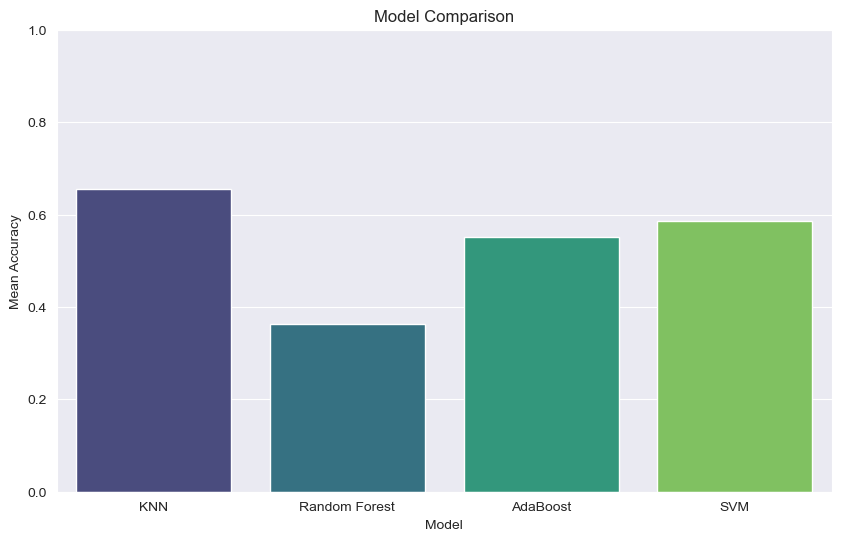

In [12]:
plt.figure(figsize=(10, 6))

models = ['KNN', 'Random Forest', 'AdaBoost', 'SVM']
accuracies = [knn_grid_search.score(x_test, y_test), rf_grid_search.score(x_test, y_test), ab_grid_search.score(x_test, y_test), svm_grid_search.score(x_test, y_test)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.ylim(0,1)

plt.savefig('model_comparison_mean_accuracy.png', dpi=300)
plt.show()